住宅情報の分析

EDA : Explanatory Data Analysis 探索的データ解析

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline
import missingno
import seaborn as sns, numpy as np

**【問題1】データセットの取得**

In [3]:
print("")
print("pd.read_csv()を使用して、変数に格納")
print("")
train = pd.read_csv('train.csv')


pd.read_csv()を使用して、変数に格納



**【問題2】データセット自体の調査**<br>

goal<br>
各家の販売価格を予測する。テストセットのIDごとに、SalePrice変数の値を予測する必要あり。<br>
metric 測定基準<br>
予測値の対数と観測された販売価格の対数の間のRMSEで評価される。（ログを取るということは、高価な家と安い家を予測する際のエラーが結果に等しく影響することを意味します。）
＊RMSER(Root Mean Square Error),(Root Mean Square Deviation):平均平方二乗誤差<br>
Data fields<br>
* SalePrice, MS, Lot, access, Condition, Overall ,Year, Roof, Exterior, Masonry veneer, Exterior, basement, Heating, Floor, Bath, Kitchen, Fireplace, Garage, square feet, miscellaneous, Month Sold, Year Sold, Type of sale, Condition of sale

**【問題3】データの確認**<br>
①各特徴量がどういったものかを見る。（数値データか文字データなど）<br>
②今回の目的変数はどの列か確認する。<br>
③特徴量の平均値と標準偏差、四分位数を一度に表示させる。

In [4]:
print("")
print("①各特徴量がどういったものかを見る。（数値データか文字データなど）")
print("")

display(train)


①各特徴量がどういったものかを見る。（数値データか文字データなど）



,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
print("")
print("②今回の目的変数はどの列か確認する。")
print("")
print("SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.")



②今回の目的変数はどの列か確認する。

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


In [6]:
print("")
print("③特徴量の平均値と標準偏差、四分位数を一度に表示させる。")
print("")
train.describe()


③特徴量の平均値と標準偏差、四分位数を一度に表示させる。



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


**【問題4】欠損値への対応**<br>
①各特徴量の欠損値の有無を確認する。<br>
②欠損値が何パーセント含まれるかを確認する。<br>
③5つ以上欠損値がある特徴量（列）は削除する。<br>
④5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。<br>


①各特徴量の欠損値の有無を確認する。



<AxesSubplot:>

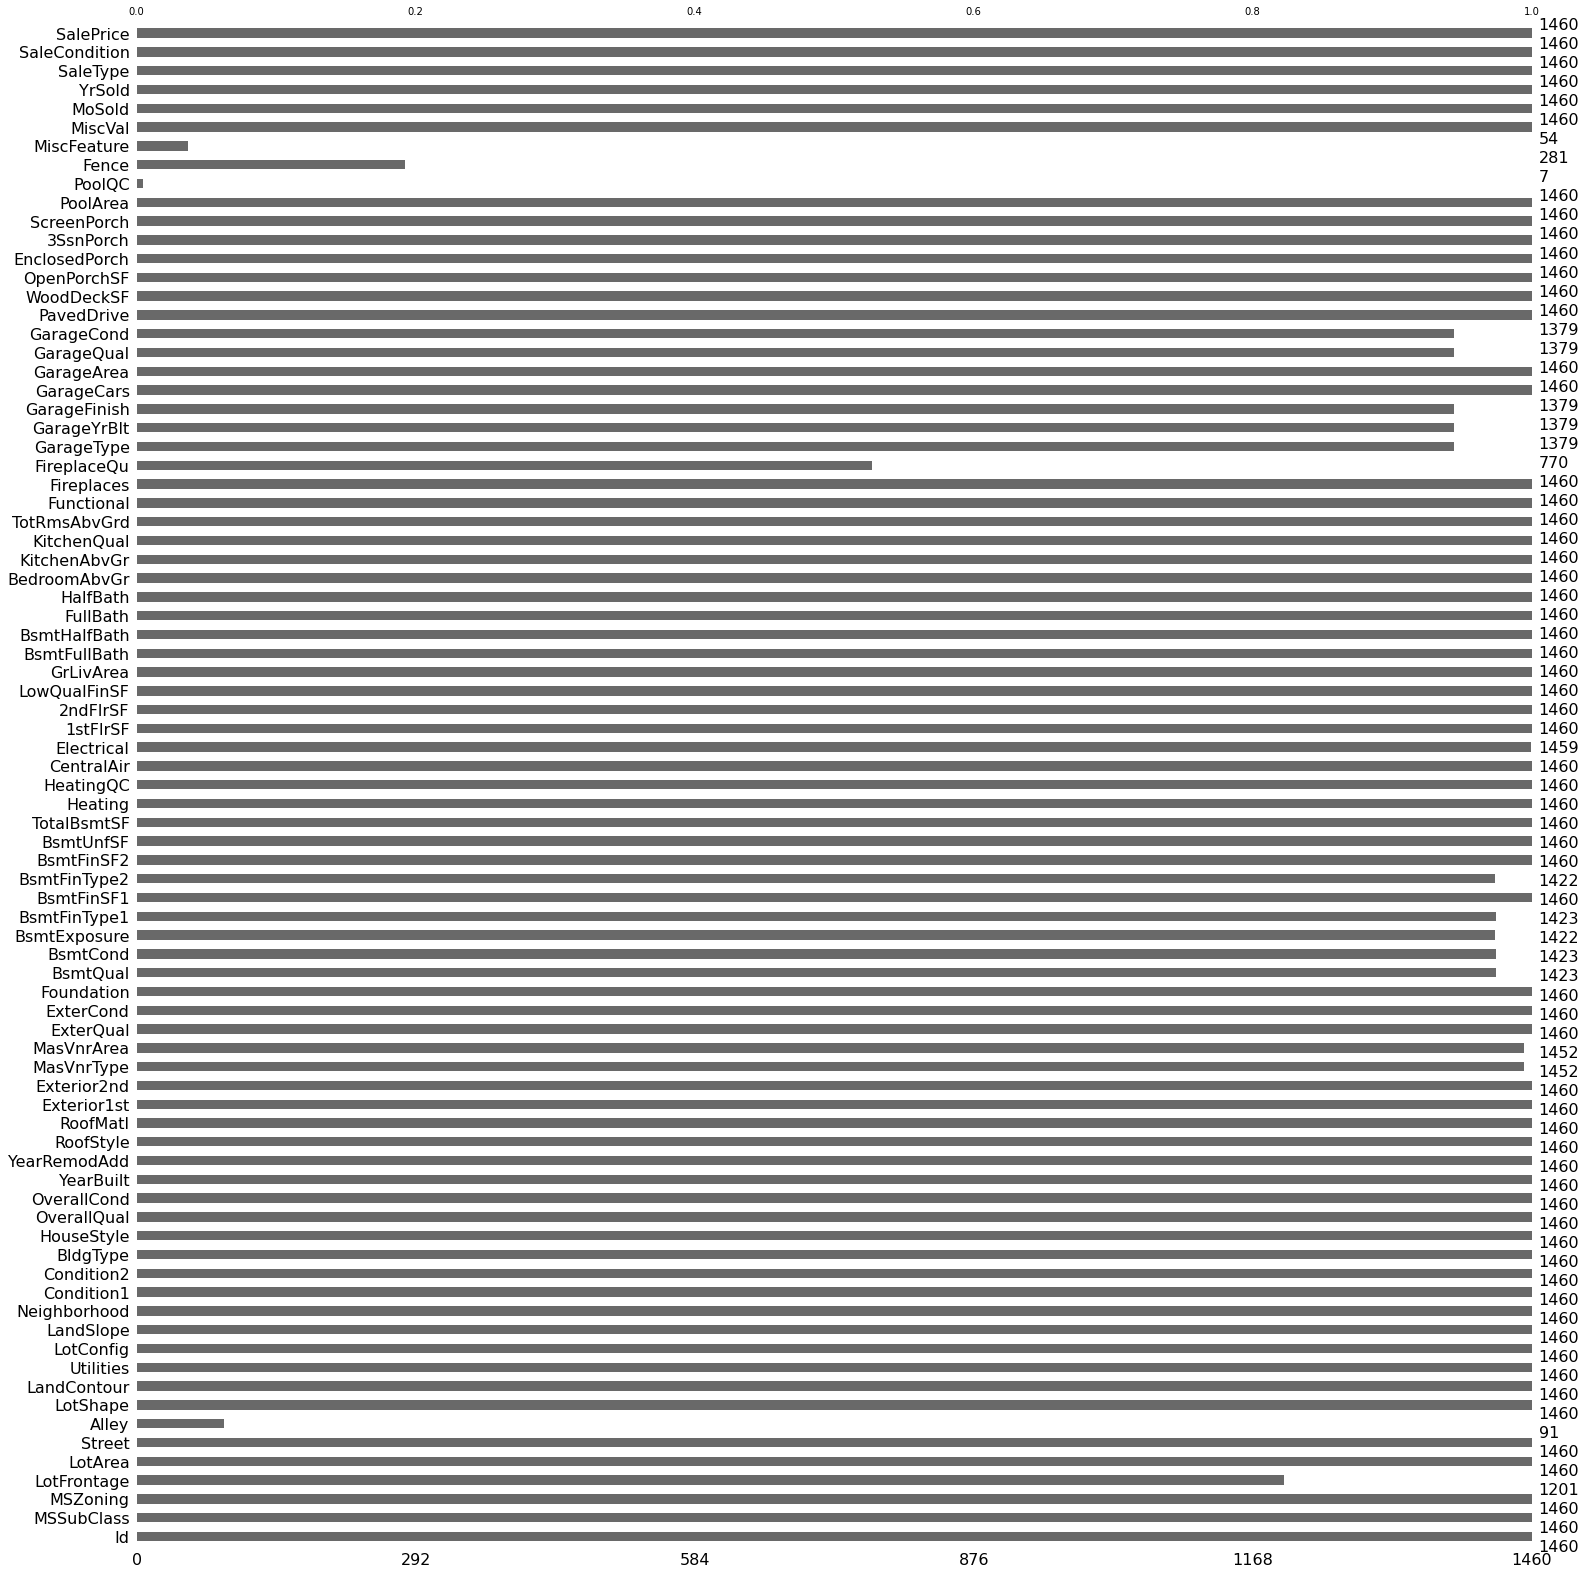

In [7]:
print("")
print("①各特徴量の欠損値の有無を確認する。")
print("")
# train.isnull()
missingno.bar(train)

In [28]:
print("")
print("②欠損値が何パーセント含まれるかを確認する。")
print("Total")
print("")
train.count()


②欠損値が何パーセント含まれるかを確認する。
Total



Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64

In [26]:
print("")
print("missing_ratio")
print("")

# train.isnull().sum()
# train.count()
display(train.isnull().sum() / train.count()*100)
#train.isnull().sum() / train.count()*100


missing_ratio



Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      21.565362
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [31]:
print("")
print("③5つ以上欠損値がある特徴量（列）は削除する。")
print("")
n_thresh = train.shape[0] - 5 # 欠損値分引いてる
train_delete =  train.dropna(thresh=n_thresh, axis=1) 
train_delete


③5つ以上欠損値がある特徴量（列）は削除する。



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [33]:
print("")
print("④5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。")
print("")
train_delete.dropna(axis=0,how='any')


④5つ以上欠損値がある特徴量を削除したデータから、欠損値があるサンプル（行）は削除する。



,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


**【問題5】用語の調査**

**尖度（せんど）**<br>
分布の尖り具合、もしくは裾野の伸び具合を示した数値。<br>
尖度はデータをヒストグラムにしたとき、その形がどれだけ正規分布よりつぶれてるの・飛び出てるの？を示す値です。<br>
尖度（kurtosis)は、確率変数の確率密度関数や頻度分布の鋭さを表す数字である。<br>
正規分布と比べて、尖度が大きければ鋭いピークと長く太い裾を持った分布を持ち、尖度が小さければより丸みがかったピークと短く細い尾を持った分布であるという事が判断できる。<br>
**歪度（わいど）**<br>
分布が対称であるかを示す値。<br>
歪度はデータをヒストグラムにしたとき、その形がどれだけ正規分布より左右に偏ってるの？を示す値。<br>
歪度（skewness)とは、分布の歪み度合いを示すものです。<br>
正規分布のように左右対称であるのか、それとも片方の裾だけだ伸びたような歪んだ分布なのか、その度合いを示します。
これを歪度（または歪度係数）といって、歪度が0 よりも大きければ右の裾が長い分布、歪度が0 よりも小さければ左の裾が長い分布となります。

**【問題6】分布の確認**

①seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。<br>
②目的変数に対して対数変換を行う。<br>
③対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。<br>
④対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。<br>


①seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。

Kurtosis : 6.536282
Skewness : 1.882876


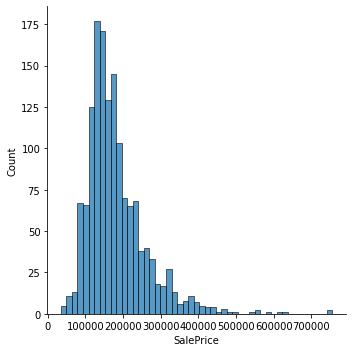

In [70]:
print("")
print("①seabornのsns.displot()やsns.histplot()を使い目的変数の分布を表示し、「尖度」と「歪度」も算出する。")
print("")

sns.displot(train.SalePrice)
# sns.histplot(train.SalePrice)

print("Kurtosis : %f" % train['SalePrice'].kurt())
print("Skewness : %f" % train['SalePrice'].skew())

In [66]:
print("")
print("②目的変数に対して対数変換を行う。")
print("対数変換とは、対数正規分布にしたがう変数の対数をとって正規分布に従う変数を作ること。")
print("対数変換により、少数や、巨大な数値などを整理・表現しやすくすることができる。")
print("")
# log transformation
# train_log = train.SalePrice.apply(np.log)
train_log = np.log(train.SalePrice)
train_log


②目的変数に対して対数変換を行う。
対数変換とは、対数正規分布にしたがう変数の対数をとって正規分布に従う変数を作ること。
対数変換により、少数や、巨大な数値などを整理・表現しやすくすることができる。



0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64


③対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。

Kurtosis : 0.809532
Skewness : 0.121335


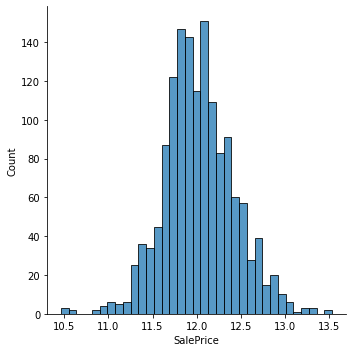

In [71]:
print("")
print("③対数変換したものに対して分布を表示し、「尖度」と「歪度」も算出する。")
print("")
sns.displot(train_log)
print("Kurtosis : %f" % train_log.kurt())
print("Skewness : %f" % train_log.skew())

**④対数変換の前後での変化を「正規分布」という言葉を含めて説明してください。このように加工することで予測時の精度を上げることができます。**<br>

対数変換後、歪度が値が小さくなっており、図からも正規分布に近づいているのがわかる。<br>

通常正規分布の形状を決定づける因子は平均値と標準偏差の2つです。<br>
別に正規分布を特徴づける値が尖度と歪度。<br>
正規分布の歪度は「0」。<br>

もとのデータが対数正規分布にしたがっているならば、対数変換後のデータは正規分布に従う。<br>
もとのデータが対数正規分布に従っていない場合は、対数変換によりさらに歪度が増大し、正規分布から離れてしまう。<br>

対数変換はデータを正規分布に従わせる以外にも、外れ値が含まれるデータの分散を小さくするためにも使われます。<br>
しかし、ケースによっては対数変換によって分散が増大してしまうこともあります。<br>

**【問題7】相関係数の確認**<br>
①相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。<br>
②目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。<br>
③選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。<br>
④選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。


①相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。



/Users/shunnadamoto/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


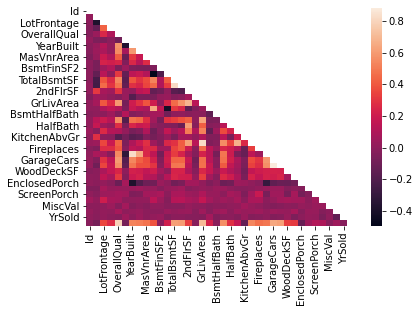

In [134]:
# train.corr()
print("")
print("①相関係数行列のヒートマップを作り、相関係数の高い関係を見つける。")
print("")
mask = np.triu(np.ones_like(train.corr(), dtype=np.bool))
sns.heatmap(train.corr(), mask=mask)
# sns.heatmap(train.corr())
plt.show()

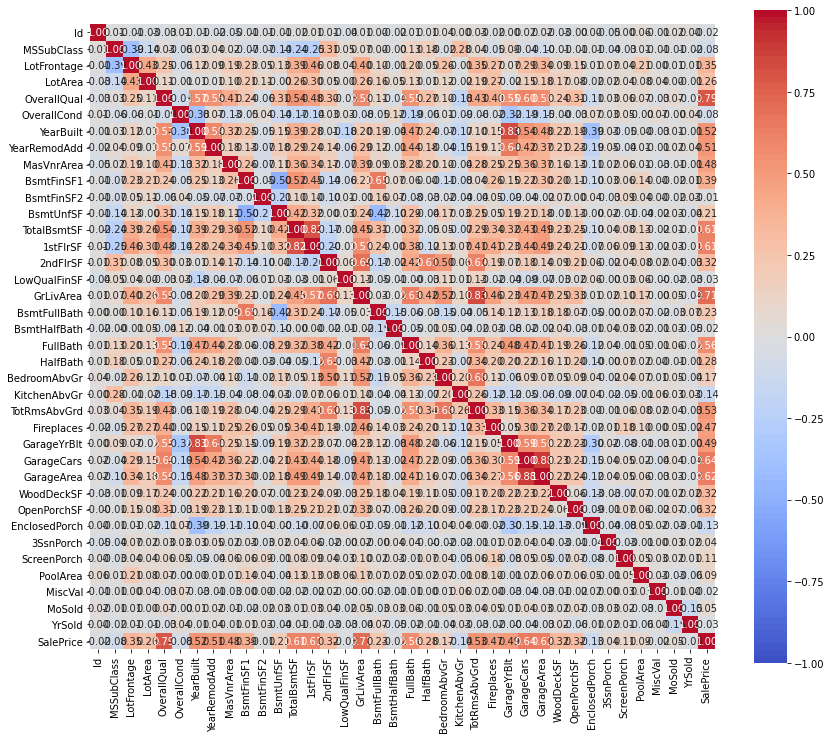

In [95]:
plt.figure(figsize=(14,12))
 
sns.heatmap(train.corr(), # データ
            vmin=-1, vmax=1, # 範囲　The correlation coefficient ranges from -1 to 1
            annot=True, fmt='0.2f', # 数値表示
            cmap=sns.color_palette('coolwarm', 100), # 色指定
            square=True, # ヒートマップを正方形で表示
            );

In [80]:
print("")
print("②目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。")
print("")


②目的変数との相関の高い特徴量10個を選び、これらだけの相関係数行列ヒートマップを作る。



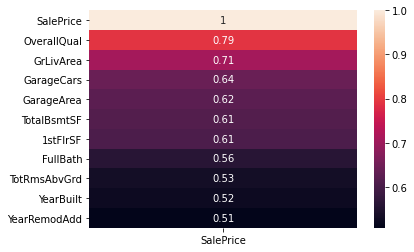

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [121]:
train_corr_ten = train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(11)
sns.heatmap(train_corr_ten, annot=True)
plt.show()
train_corr_ten

In [117]:
# train_ten = train.corr().unstack()
# mn = train_ten[(abs(train_ten)>0.6) & (abs(train_ten) < 1)]

In [118]:
#train.corr()[train.corr() > 0.5].stack().sort_values().head(10)

③選んだ10個の特徴量が何か表しているかをKaggleのDataDescriptionの記述を参考に日本語でまとめる。<br>

交通アクセスより広さが関係。築年数よりも素材、仕上げりの良さが優先。<br>
<br>
SalePrice-プロパティのドルでの販売価格<br>
OverallQual：総合素材と仕上がりの品質<br>
GrLivArea：地上（地上）のリビングエリアの平方フィート<br>
GarageCars：車の容量でのガレージのサイズ<br>
GarageArea：ガレージのサイズ（平方フィート）<br>
TotalBsmtSF：地下室の総平方フィート<br>
1stFlrSF：1階平方フィート<br>
FullBath：グレード以上のフルバスルーム<br>
TotRmsAbvGrd：グレード以上の部屋の合計（バスルームは含まれません）<br>
YearBuilt：元の建設日<br>
YearRemodAdd：改造日<br>


④選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。



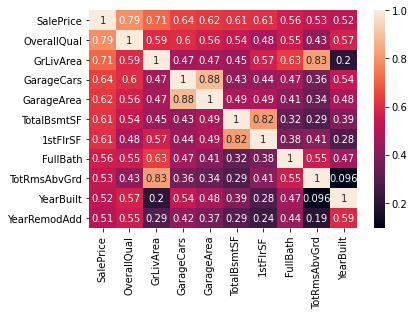


相関係数0.88 : GarageArea, GarageCars
相関係数0.83 : TotRmsAbvGrd, GrLivArea
相関係数0.82 : 1stFlrSF, TotalBsmtSF



In [143]:
print("")
print("④選んだ10個の特徴量の中でお互いの相関係数が高い組み合わせを3つ探し出す。")
print("")
train_corr_ten_high = train.corr().loc[train_corr_ten.head(11).index,
                                 train_corr_ten.head(10).index]
train_corr_ten_high
sns.heatmap(train_corr_ten_high, annot=True)
plt.show()

print("")
print("相関係数0.88 : GarageArea, GarageCars")
print("相関係数0.83 : TotRmsAbvGrd, GrLivArea")
print("相関係数0.82 : 1stFlrSF, TotalBsmtSF")
print("")